In [1]:
#pip install tensorflow

In [2]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [3]:
#pip install opencv-python

In [4]:
import cv2

In [5]:
# import necessary library

import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import utils
from keras.utils import np_utils
import keras
from keras.datasets import mnist

In [6]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [7]:
y_train[0]

5

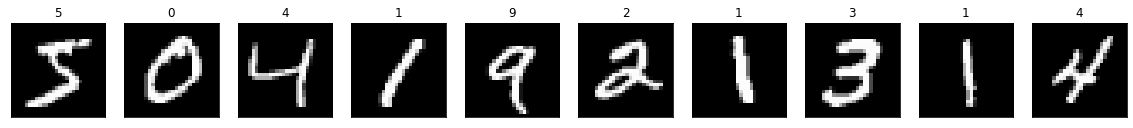

In [8]:
fig,axes=plt.subplots(ncols=10,sharex=False,sharey=True,figsize=(20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i],cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
# as we observe it give fig size as 28,28 and we know there is also a 1 chanel black and white so it should be 28,28,1

# so reshaping this

X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
# now we are converting int to float32 values because it will bcome easier while doing convolution part

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [13]:
# normalize the data (Converting the numbers to 0 and 1)
X_train /= 255
X_test /= 255

In [14]:
# converting it into categorical value (to_categorical method if 3 is number the 0,0,0,1,0,0,0,0,0,0)
y_train=np_utils.to_categorical(y_train , 10)
y_test=np_utils.to_categorical(y_test , 10)

In [15]:
# observe that to categorical is done or not as in above we look shape and it give 5 as output here now we successfully convert it into categorical
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
# model building
model=Sequential()
model.add(Conv2D(32, (3,3,) , activation='relu' , kernel_initializer='he_uniform' , input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100 , activation='relu' , kernel_initializer='he_uniform'))
model.add(Dense(10 , activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [18]:
#pip install pydot

In [19]:
#pip install graphviz

In [20]:
import pydot
#import pydotplus
import graphviz

In [21]:
#conda install pydot

In [22]:
#conda install graphviz

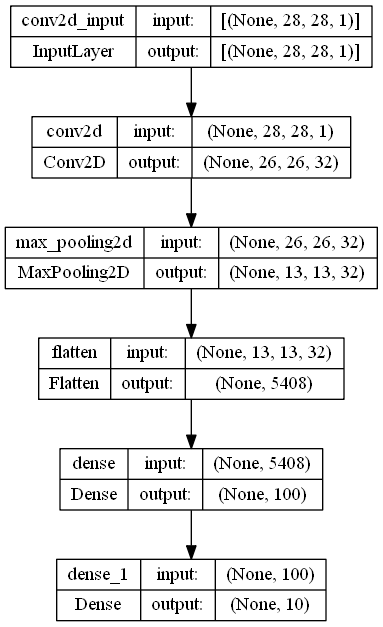

In [23]:
utils.plot_model(model,show_shapes=True)

In [24]:
earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [25]:
# train the model
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=32 , epochs=50 , verbose=1 , validation_data=(X_test,y_test),callbacks=earlystopping)

Epoch 1/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1277 - accuracy: 0.9604 - val_loss: 0.0633 - val_accuracy: 0.9801
Epoch 2/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0513 - val_accuracy: 0.9829


In [26]:
# save the model
model.save('mnist_cnn_model.h5')

In [27]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

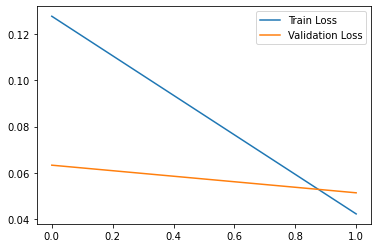

In [28]:
#plot the graph
plt.plot(model.history.history['loss'] , label='Train Loss')
plt.plot(model.history.history['val_loss'] , label='Validation Loss')
plt.legend()

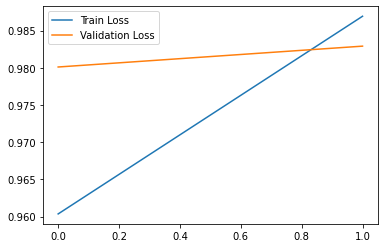

In [29]:
#plot the graph
plt.plot(model.history.history['accuracy'] , label='Train Loss')
plt.plot(model.history.history['val_accuracy'] , label='Validation Loss')
plt.legend()

In [30]:
#load the model
model=keras.models.load_model('mnist_cnn_model.h5')

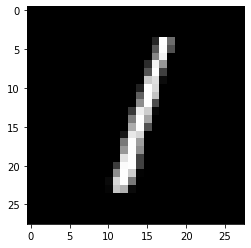

In [31]:
#test
plt.imshow(X_test[2] , cmap='gray')

In [32]:
# follow the same steps of reshpe and we will give batch size as 1 beacuse 1 single image 
X=np.reshape(X_test[2] , (1,28,28,1))
np.argmax(model.predict(X))

1/1 [==============================] - 0s 70ms/step


1

In [33]:
model.predict(X)

1/1 [==============================] - 0s 16ms/step


array([[1.5752385e-06, 9.9970633e-01, 1.4110082e-05, 1.7956738e-06,
        4.0187948e-05, 3.9993907e-07, 9.7167231e-06, 2.2360870e-04,
        2.2065965e-06, 2.1674519e-07]], dtype=float32)